**SC11 Group 1**

**Members : Jeremy Ong, Qian Cheng, Rhys Wong**

Installing / Importing libraries & retrieving data set

**Uncomment** the bottom block if libraries are not installed

In [1]:
# Used for Regression model and visualization
#!pip install xgboost==1.6.0
#!pip install plotly==5.7.0

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

sb.set() # set the default Seaborn style for graphics


In [4]:
df = pd.read_csv('data.csv')
df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-Five Deaths                2938 non-null   int64  
 12  Polio               

# Data preperation and cleaning

In [6]:
# Retrieve relevant columns
# Hepatitis Bleft out as they have more null data
headers = ["Country", "Year", "Life Expectancy", "Adult Mortality", "Infant Deaths", "Alcohol", "Measles", "BMI", "Under-Five Deaths", "Polio", "Diphtheria", "HIV/AIDS", "Schooling"]
predictors = df[headers]
predictors 

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Measles,BMI,Under-Five Deaths,Polio,Diphtheria,HIV/AIDS,Schooling
0,Afghanistan,2015,65.0,263.0,62,0.01,1154,19.1,83,6.0,65.0,0.1,10.1
1,Afghanistan,2014,59.9,271.0,64,0.01,492,18.6,86,58.0,62.0,0.1,10.0
2,Afghanistan,2013,59.9,268.0,66,0.01,430,18.1,89,62.0,64.0,0.1,9.9
3,Afghanistan,2012,59.5,272.0,69,0.01,2787,17.6,93,67.0,67.0,0.1,9.8
4,Afghanistan,2011,59.2,275.0,71,0.01,3013,17.2,97,68.0,68.0,0.1,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,31,27.1,42,67.0,65.0,33.6,9.2
2934,Zimbabwe,2003,44.5,715.0,26,4.06,998,26.7,41,7.0,68.0,36.7,9.5
2935,Zimbabwe,2002,44.8,73.0,25,4.43,304,26.3,40,73.0,71.0,39.8,10.0
2936,Zimbabwe,2001,45.3,686.0,25,1.72,529,25.9,39,76.0,75.0,42.1,9.8


In [7]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            2938 non-null   object 
 1   Year               2938 non-null   int64  
 2   Life Expectancy    2928 non-null   float64
 3   Adult Mortality    2928 non-null   float64
 4   Infant Deaths      2938 non-null   int64  
 5   Alcohol            2744 non-null   float64
 6   Measles            2938 non-null   int64  
 7   BMI                2904 non-null   float64
 8   Under-Five Deaths  2938 non-null   int64  
 9   Polio              2919 non-null   float64
 10  Diphtheria         2919 non-null   float64
 11  HIV/AIDS           2938 non-null   float64
 12  Schooling          2775 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 298.5+ KB


In [8]:
# Replacing missing data with median of each column
clean_data = predictors.fillna({
    "Life Expectancy": predictors["Life Expectancy"].median(),
    "Adult Mortality": predictors["Adult Mortality"].median(),
    "Alcohol": predictors["Alcohol"].median(),
    "BMI": predictors["BMI"].median(),
    "Polio": predictors["Polio"].median(),
    "Diphtheria": predictors["Diphtheria"].median(),
    "Schooling": predictors["Schooling"].median(),
    })
clean_data

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Measles,BMI,Under-Five Deaths,Polio,Diphtheria,HIV/AIDS,Schooling
0,Afghanistan,2015,65.0,263.0,62,0.01,1154,19.1,83,6.0,65.0,0.1,10.1
1,Afghanistan,2014,59.9,271.0,64,0.01,492,18.6,86,58.0,62.0,0.1,10.0
2,Afghanistan,2013,59.9,268.0,66,0.01,430,18.1,89,62.0,64.0,0.1,9.9
3,Afghanistan,2012,59.5,272.0,69,0.01,2787,17.6,93,67.0,67.0,0.1,9.8
4,Afghanistan,2011,59.2,275.0,71,0.01,3013,17.2,97,68.0,68.0,0.1,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,31,27.1,42,67.0,65.0,33.6,9.2
2934,Zimbabwe,2003,44.5,715.0,26,4.06,998,26.7,41,7.0,68.0,36.7,9.5
2935,Zimbabwe,2002,44.8,73.0,25,4.43,304,26.3,40,73.0,71.0,39.8,10.0
2936,Zimbabwe,2001,45.3,686.0,25,1.72,529,25.9,39,76.0,75.0,42.1,9.8


In [9]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            2938 non-null   object 
 1   Year               2938 non-null   int64  
 2   Life Expectancy    2938 non-null   float64
 3   Adult Mortality    2938 non-null   float64
 4   Infant Deaths      2938 non-null   int64  
 5   Alcohol            2938 non-null   float64
 6   Measles            2938 non-null   int64  
 7   BMI                2938 non-null   float64
 8   Under-Five Deaths  2938 non-null   int64  
 9   Polio              2938 non-null   float64
 10  Diphtheria         2938 non-null   float64
 11  HIV/AIDS           2938 non-null   float64
 12  Schooling          2938 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 298.5+ KB


In [10]:
clean_data.describe()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Measles,BMI,Under-Five Deaths,Polio,Diphtheria,HIV/AIDS,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,2419.592240,38.381178,42.035739,82.617767,82.393125,1.742103,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,11467.272489,19.935375,160.445548,23.367166,23.655562,5.077785,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,3.000000,2.000000,0.100000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,0.000000,19.400000,0.000000,78.000000,78.000000,0.100000,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,17.000000,43.500000,4.000000,93.000000,93.000000,0.100000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,360.250000,56.100000,28.000000,97.000000,97.000000,0.800000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,212183.000000,87.300000,2500.000000,99.000000,99.000000,50.600000,20.700000


This shows that there are multiple outlier data among the different predictors, so we need to remove them

# Removing Outliers


In [11]:
def mark_outlier(df, str):
    Q1 = df[str].quantile(0.25)
    Q3 = df[str].quantile(0.75)
    IQR = Q3 - Q1
    return (IQR, Q1, Q3)

def remove_outlier(df, outliers, str):
    tup = outliers[str]
    IQR = tup[0]
    Q1 = tup[1]
    Q3 = tup[2]
    trueList = df[~((df[str] < (Q1 - 1.5 * IQR)) | (df[str] > (Q3 + 1.5 * IQR)))]
    return trueList

filtered = clean_data
outliers = ["Infant Deaths", "Measles", "Under-Five Deaths"]
IQRs = {}

for item in outliers: 
    IQRs[item] = mark_outlier(filtered, item)

for item in outliers:
    filtered = remove_outlier(filtered, IQRs, item)

filtered

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Measles,BMI,Under-Five Deaths,Polio,Diphtheria,HIV/AIDS,Schooling
16,Albania,2015,77.8,74.0,0,4.60,0,58.0,0,99.0,99.0,0.1,14.2
17,Albania,2014,77.5,8.0,0,4.51,0,57.2,1,98.0,98.0,0.1,14.2
18,Albania,2013,77.2,84.0,0,4.76,0,56.5,1,99.0,99.0,0.1,14.2
19,Albania,2012,76.9,86.0,0,5.14,9,55.8,1,99.0,99.0,0.1,14.2
20,Albania,2011,76.6,88.0,0,5.37,28,55.1,1,99.0,99.0,0.1,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,Zimbabwe,2006,45.4,7.0,28,4.57,212,27.9,45,71.0,7.0,26.8,9.5
2932,Zimbabwe,2005,44.6,717.0,28,4.14,420,27.5,43,69.0,68.0,30.3,9.3
2933,Zimbabwe,2004,44.3,723.0,27,4.36,31,27.1,42,67.0,65.0,33.6,9.2
2935,Zimbabwe,2002,44.8,73.0,25,4.43,304,26.3,40,73.0,71.0,39.8,10.0


## Data Analysis & Visualisation

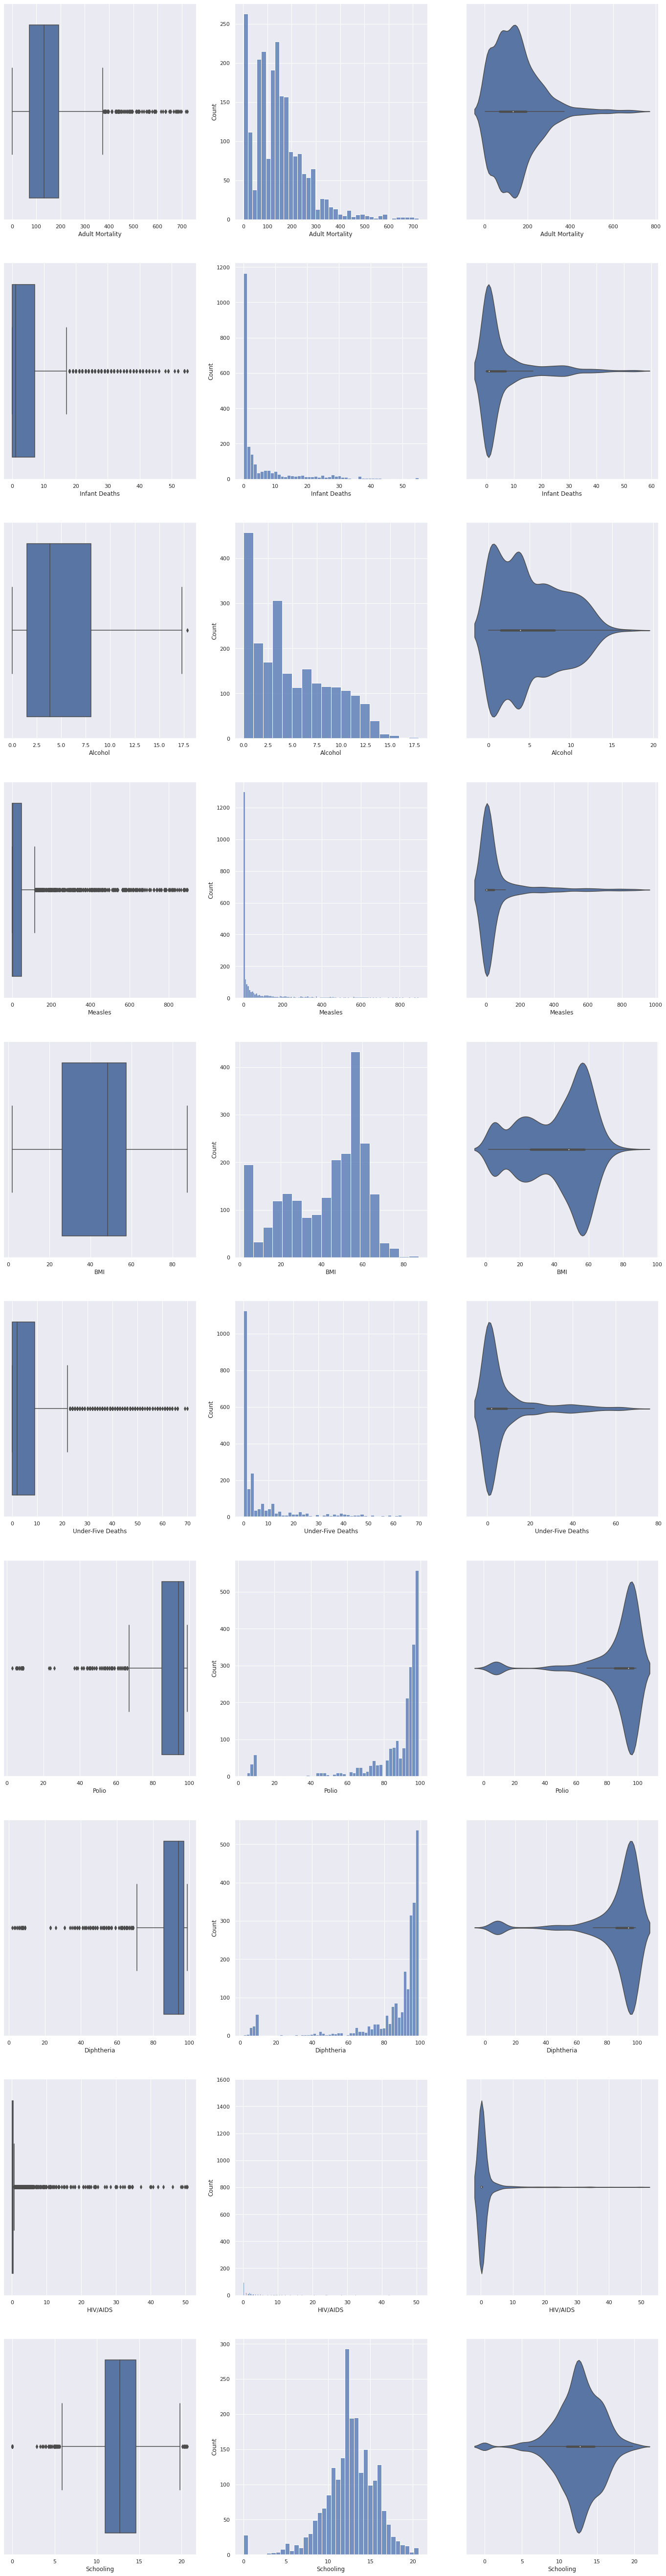

In [12]:
# Draw the distributions of all variables
f, axes = plt.subplots(10, 3, figsize=(24, 96))

count = 0
for var in filtered[["Adult Mortality", "Infant Deaths", "Alcohol", "Measles", "BMI", "Under-Five Deaths", "Polio", "Diphtheria", "HIV/AIDS", "Schooling"]]:
    sb.boxplot(x = filtered[var], ax = axes[count, 0])
    sb.histplot(x = filtered[var], ax = axes[count, 1])
    sb.violinplot(x = filtered[var], ax = axes[count, 2])
    count += 1

In [44]:
px.scatter(filtered, x = 'Adult Mortality', y = 'Life Expectancy', template = 'seaborn', range_y = [0, 100], color = 'Year') 

In [45]:
px.scatter(filtered, x = 'Infant Deaths', y = 'Life Expectancy', template = 'seaborn', range_y = [0, 100], color = 'Year') 


In [46]:
px.scatter(filtered, x = 'Alcohol', y = 'Life Expectancy', template = 'seaborn', range_y = [0, 100], color = 'Year') 


In [48]:
px.scatter(filtered, x = 'Measles', y = 'Life Expectancy', template = 'seaborn', range_y = [0, 100], color = 'Year') 


In [49]:
px.scatter(filtered, x = 'BMI', y = 'Life Expectancy', template = 'seaborn', range_y = [0, 100], color = 'Year') 


In [50]:
px.scatter(filtered, x = 'Under-Five Deaths', y = 'Life Expectancy', template = 'seaborn', range_y = [0, 100], color = 'Year') 


In [51]:
px.scatter(filtered, x = 'Polio', y = 'Life Expectancy', template = 'seaborn', range_y = [0, 100], color = 'Year') 


In [52]:
px.scatter(filtered, x = 'Diphtheria', y = 'Life Expectancy', template = 'seaborn', range_y = [0, 100], color = 'Year') 


In [53]:
px.scatter(filtered, x = 'HIV/AIDS', y = 'Life Expectancy', template = 'seaborn', range_y = [0, 100], color = 'Year') 


In [54]:
px.scatter(filtered, x = 'Schooling', y = 'Life Expectancy', template = 'seaborn', range_y = [0, 100], color = 'Year') 


## Multi Variate Linear Regression

In [23]:
Y = pd.DataFrame(filtered["Life Expectancy"])
X = pd.DataFrame(filtered[["Adult Mortality", "Infant Deaths", "Alcohol", "Measles", "BMI", "Under-Five Deaths", "Polio", "Diphtheria", "HIV/AIDS", "Schooling"]])

X

,Adult Mortality,Infant Deaths,Alcohol,Measles,BMI,Under-Five Deaths,Polio,Diphtheria,HIV/AIDS,Schooling
16,74.0,0,4.60,0,58.0,0,99.0,99.0,0.1,14.2
17,8.0,0,4.51,0,57.2,1,98.0,98.0,0.1,14.2
18,84.0,0,4.76,0,56.5,1,99.0,99.0,0.1,14.2
19,86.0,0,5.14,9,55.8,1,99.0,99.0,0.1,14.2
20,88.0,0,5.37,28,55.1,1,99.0,99.0,0.1,13.3
...,...,...,...,...,...,...,...,...,...,...
2931,7.0,28,4.57,212,27.9,45,71.0,7.0,26.8,9.5
2932,717.0,28,4.14,420,27.5,43,69.0,68.0,30.3,9.3
2933,723.0,27,4.36,31,27.1,42,67.0,65.0,33.6,9.2
2935,73.0,25,4.43,304,26.3,40,73.0,71.0,39.8,10.0


In [24]:
Y

,Life Expectancy
16,77.8
17,77.5
18,77.2
19,76.9
20,76.6
...,...
2931,45.4
2932,44.6
2933,44.3
2935,44.8


In [25]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Y_train.describe()


Train Set : (1687, 1) (1687, 10)
Test Set  : (563, 1) (563, 10)


,Life Expectancy
count,1687.000000
mean,71.350207
std,8.440775
min,36.300000
25%,67.200000
50%,73.200000
75%,76.700000
max,89.000000


In [26]:
X_train.describe()

,Adult Mortality,Infant Deaths,Alcohol,Measles,BMI,Under-Five Deaths,Polio,Diphtheria,HIV/AIDS,Schooling
count,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000
mean,146.602253,6.062833,4.917021,69.583877,42.311263,8.078245,86.244813,85.952579,1.411618,12.579194
std,113.136136,10.191213,3.970767,159.314036,19.365977,13.999485,20.996665,21.392566,5.103915,3.112810
min,1.000000,0.000000,0.010000,0.000000,2.100000,0.000000,3.000000,2.000000,0.100000,0.000000
25%,71.000000,0.000000,1.435000,0.000000,26.200000,0.000000,85.000000,85.500000,0.100000,11.000000
50%,132.000000,1.000000,3.810000,2.000000,48.600000,1.000000,94.000000,94.000000,0.100000,12.700000
75%,191.500000,7.000000,7.980000,43.500000,57.400000,9.000000,98.000000,97.000000,0.300000,14.500000
max,723.000000,55.000000,17.310000,896.000000,87.300000,70.000000,99.000000,99.000000,50.600000,20.500000


<AxesSubplot:>

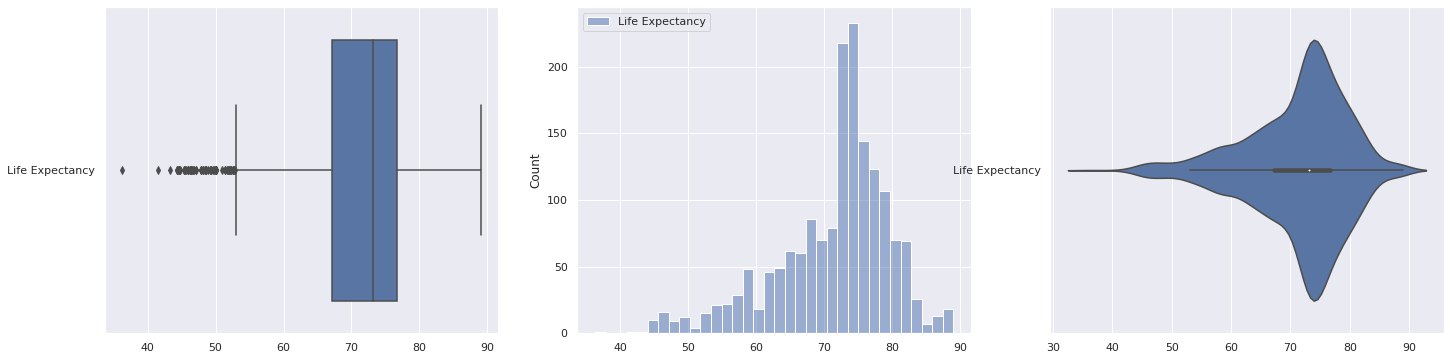

In [27]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = Y_train, orient = "h", ax = axes[0])
sb.histplot(data = Y_train, ax = axes[1])
sb.violinplot(data = Y_train, orient = "h", ax = axes[2])

In [55]:
 np.random.seed(1)



 fig = go.Figure()
 fig = make_subplots(rows=3, cols=1,)
 fig.add_trace(go.Box(x=Y_train["Life Expectancy"]), row=1,col=1)
 fig.add_trace(go.Histogram(x=Y_train["Life Expectancy"]),row=2,col=1)
 fig.add_trace(go.Violin(x=Y_train["Life Expectancy"]),row=3,col=1)
 fig.update_layout(height=800, width=800, title_text="Sample")


 fig.show()

<AxesSubplot:>

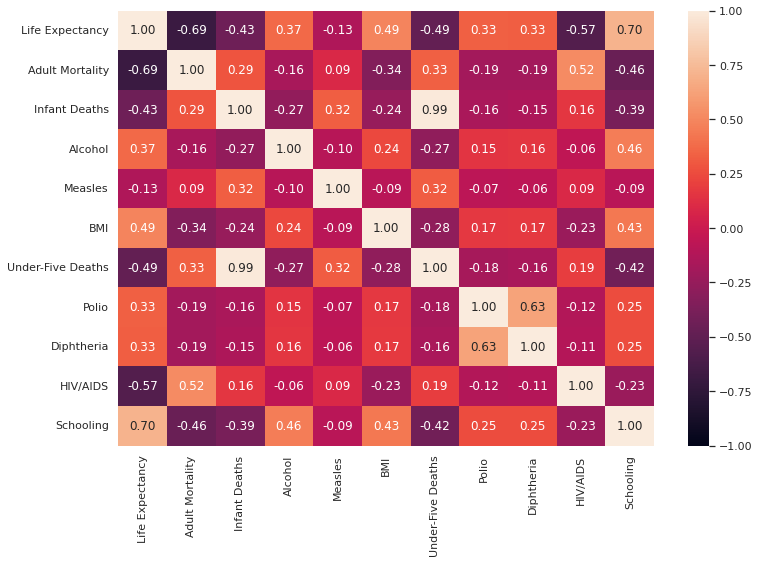

In [29]:
# Correlation between Response and the Predictors
trainDF = pd.concat([Y_train, X_train], axis = 1).reindex(Y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

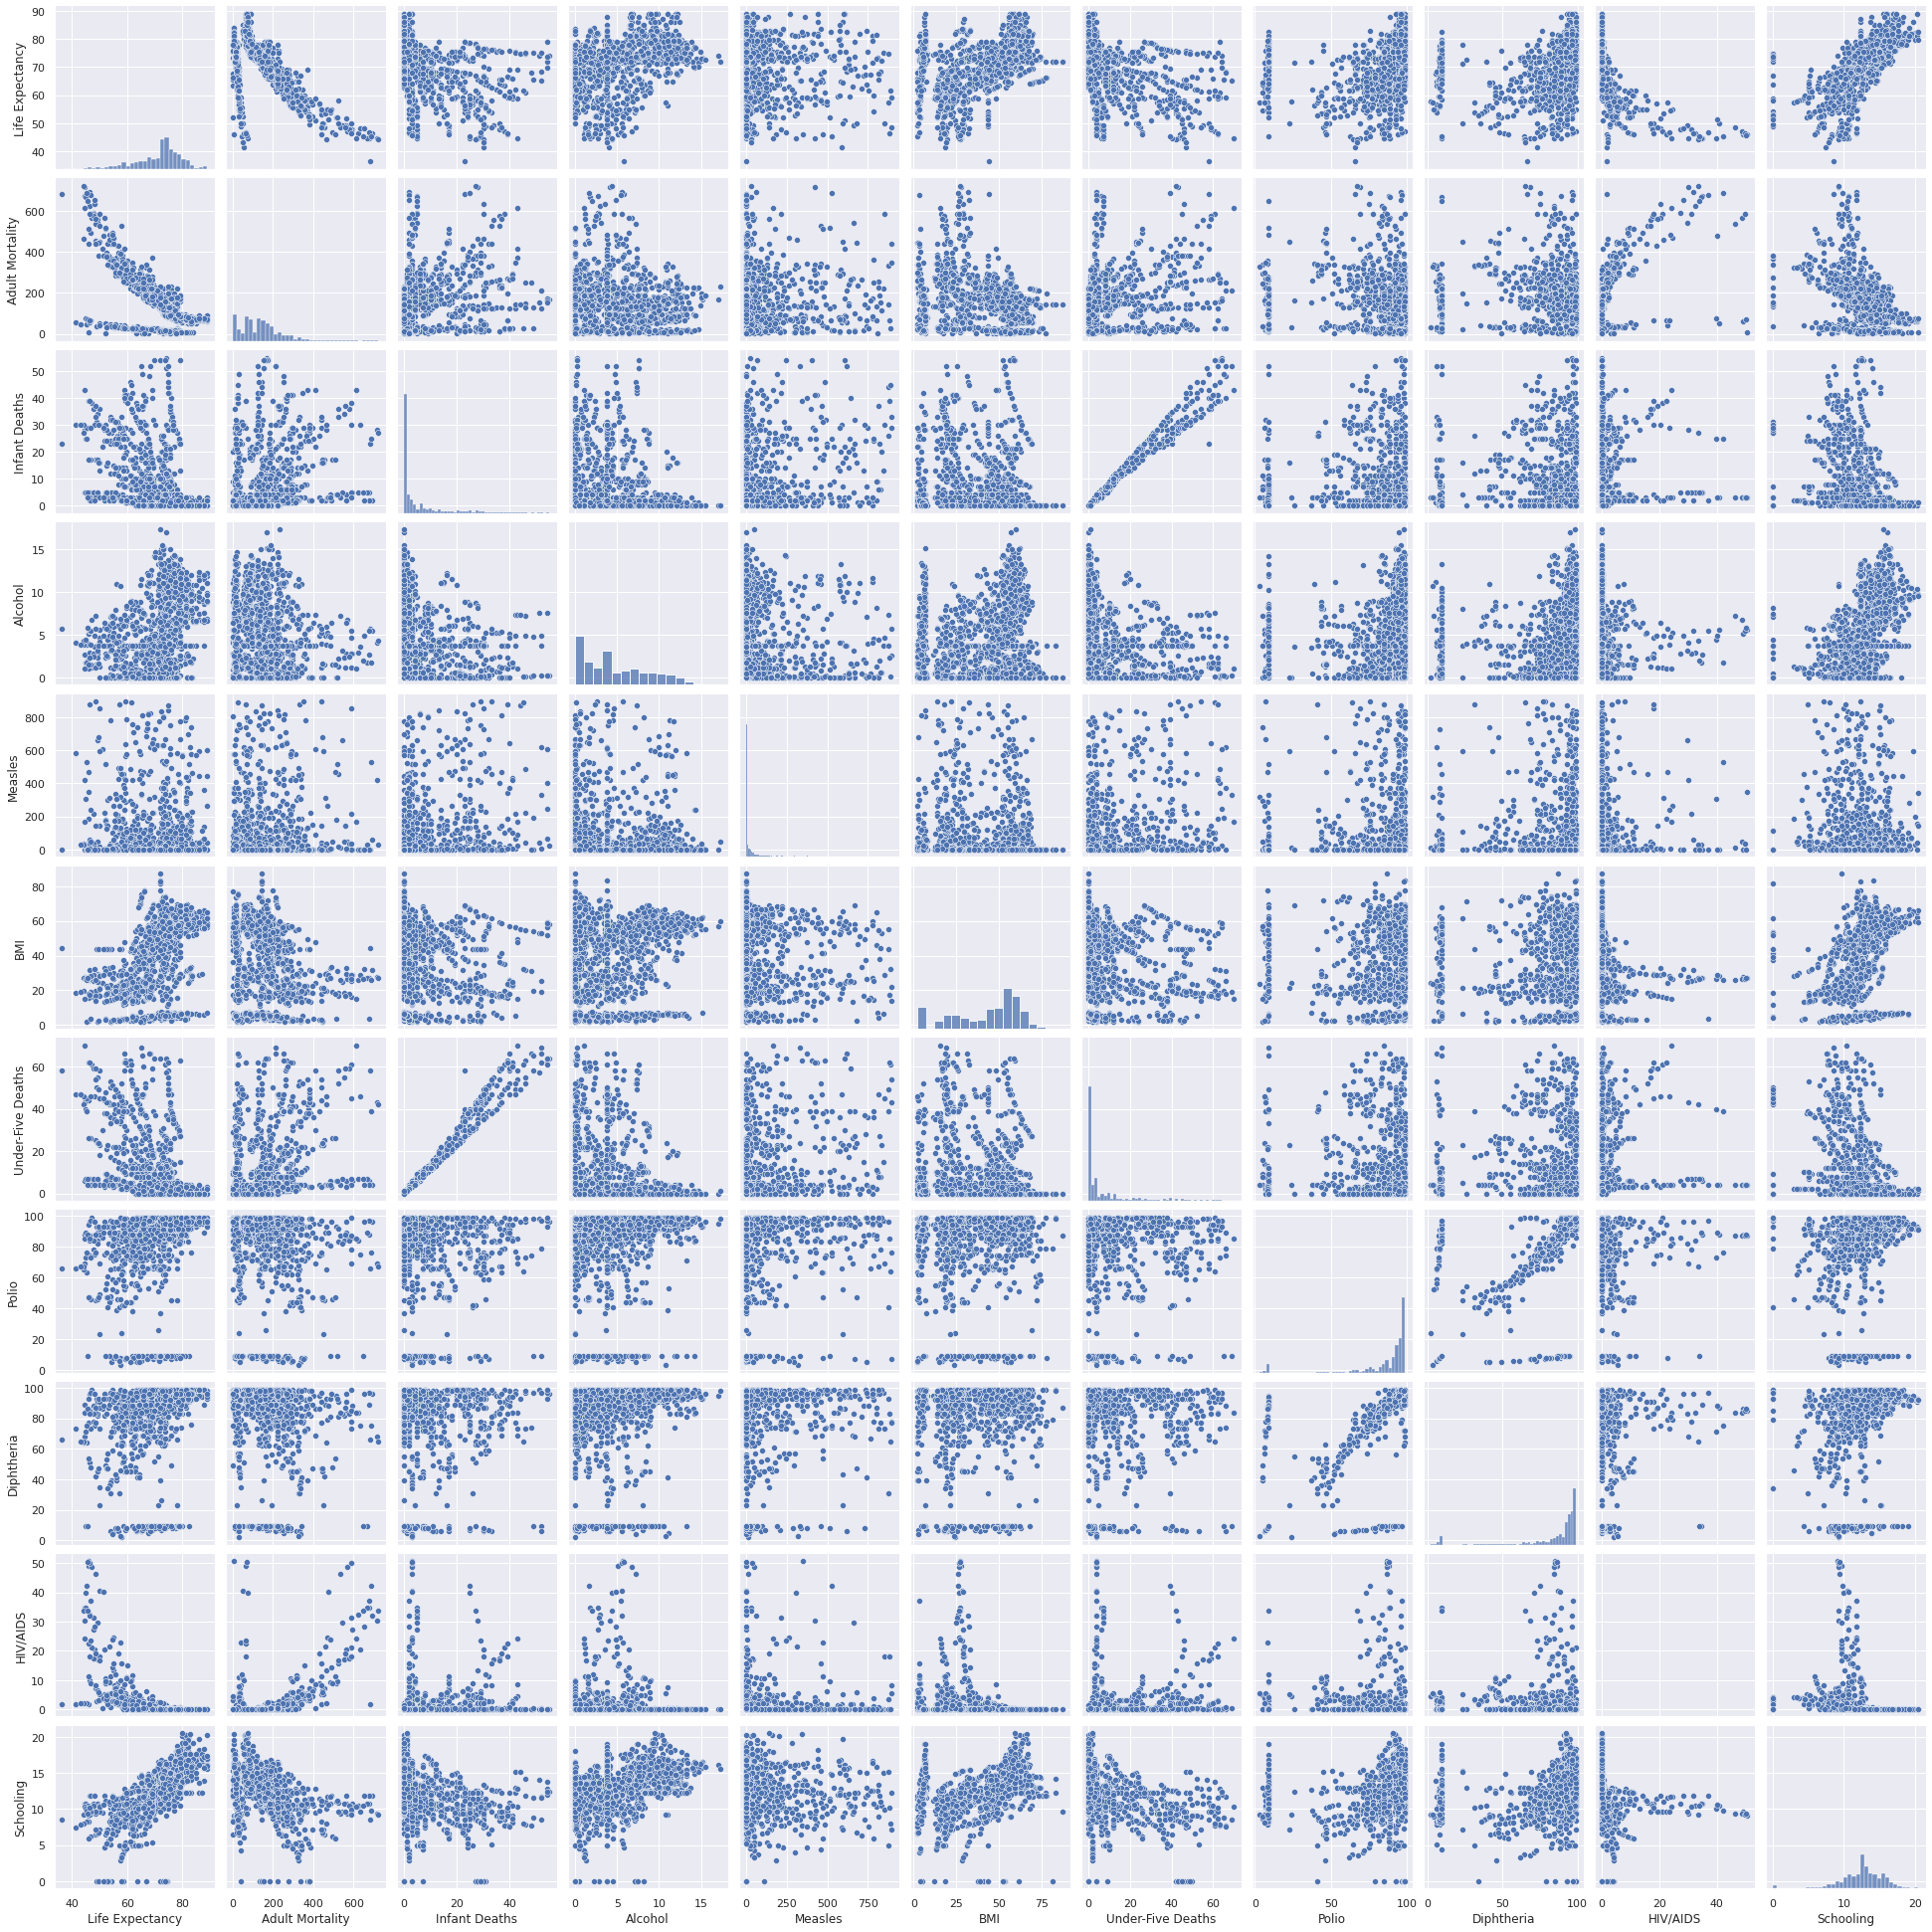

In [30]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

In [56]:
df = trainDF
fig = px.scatter_matrix(df, template='seaborn')
fig.update_layout(height=2000, width=2000, title_text="Sample")
fig.show()

In [32]:
trainDF.corr()

,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Measles,BMI,Under-Five Deaths,Polio,Diphtheria,HIV/AIDS,Schooling
Life Expectancy,1.000000,-0.690913,-0.431751,0.373291,-0.132825,0.485529,-0.491607,0.331874,0.325127,-0.569751,0.703460
Adult Mortality,-0.690913,1.000000,0.288940,-0.164473,0.086205,-0.340494,0.330550,-0.191771,-0.191833,0.518316,-0.455045
Infant Deaths,-0.431751,0.288940,1.000000,-0.272493,0.321347,-0.242213,0.987808,-0.162152,-0.147126,0.156522,-0.385073
Alcohol,0.373291,-0.164473,-0.272493,1.000000,-0.099711,0.241913,-0.274070,0.151067,0.156449,-0.060177,0.456633
Measles,-0.132825,0.086205,0.321347,-0.099711,1.000000,-0.089027,0.317502,-0.071920,-0.062835,0.088133,-0.087772
BMI,0.485529,-0.340494,-0.242213,0.241913,-0.089027,1.000000,-0.277804,0.170531,0.173953,-0.233601,0.433068
Under-Five Deaths,-0.491607,0.330550,0.987808,-0.274070,0.317502,-0.277804,1.000000,-0.177584,-0.162913,0.194414,-0.421462
Polio,0.331874,-0.191771,-0.162152,0.151067,-0.071920,0.170531,-0.177584,1.000000,0.630568,-0.119311,0.254574
Diphtheria,0.325127,-0.191833,-0.147126,0.156449,-0.062835,0.173953,-0.162913,0.630568,1.000000,-0.111377,0.253642
HIV/AIDS,-0.569751,0.518316,0.156522,-0.060177,0.088133,-0.233601,0.194414,-0.119311,-0.111377,1.000000,-0.227893


In [33]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, Y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [57.34956021]
Coefficients of Regression 	: a =  [[-1.91641783e-02  6.91703937e-01  1.82709914e-01  3.86751984e-04
   3.61534594e-02 -5.88140686e-01  2.66929849e-02  2.25579382e-02
  -4.36722474e-01  8.97359588e-01]]



,Predictors,Coefficients
0,Adult Mortality,-0.019164
1,Infant Deaths,0.691704
2,Alcohol,0.182710
3,Measles,0.000387
4,BMI,0.036153
5,Under-Five Deaths,-0.588141
6,Polio,0.026693
7,Diphtheria,0.022558
8,HIV/AIDS,-0.436722
9,Schooling,0.897360


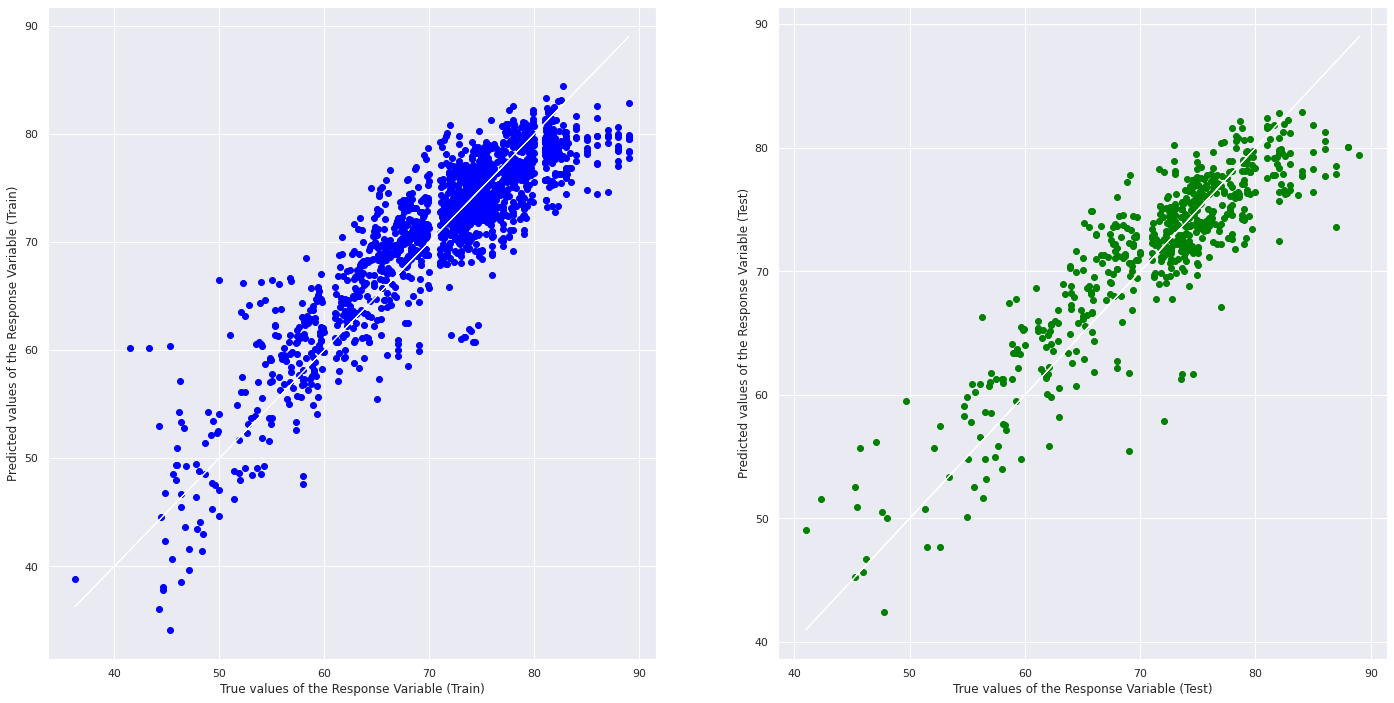

In [34]:
# Predict the Total values from Predictors
Y_train_pred = linreg.predict(X_train)
Y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(Y_train, Y_train_pred, color = "blue")
axes[0].plot(Y_train, Y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(Y_test, Y_test_pred, color = "green")
axes[1].plot(Y_test, Y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [35]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7917077327765691
Mean Squared Error (MSE) 	: 14.831335126455611

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7903881734164948
Mean Squared Error (MSE) 	: 14.386715193563473



We now have a linear regression model, but are we able to do better?
We attempt on trying out different methods to improve on our prediction.

# Feature Selection

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

sel = SelectKBest(f_regression, k=3)
a_new = sel.fit_transform(X, Y.values.ravel())

fX = X[X.columns[sel.get_support(indices= True)]]
fX

,Adult Mortality,HIV/AIDS,Schooling
16,74.0,0.1,14.2
17,8.0,0.1,14.2
18,84.0,0.1,14.2
19,86.0,0.1,14.2
20,88.0,0.1,13.3
...,...,...,...
2931,7.0,26.8,9.5
2932,717.0,30.3,9.3
2933,723.0,33.6,9.2
2935,73.0,39.8,10.0


## Cross Validation

In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

# Hyperparameters for XG Boost model
search_space = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 6, 9],
    "gamma": [0.01, 0.1],
    "learning_rate": [0.001, 0.01, 0.1, 1]
}
    
# Split data sets into 5 for cross validation
GS = GridSearchCV(estimator = xgb_model,
                  param_grid= search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5
                )

In [38]:
# Takes a few minutes to run
GS.fit(fX, Y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [39]:
GS.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [40]:
GS.best_score_

0.8905718892556207

In [41]:
GS.best_params_

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

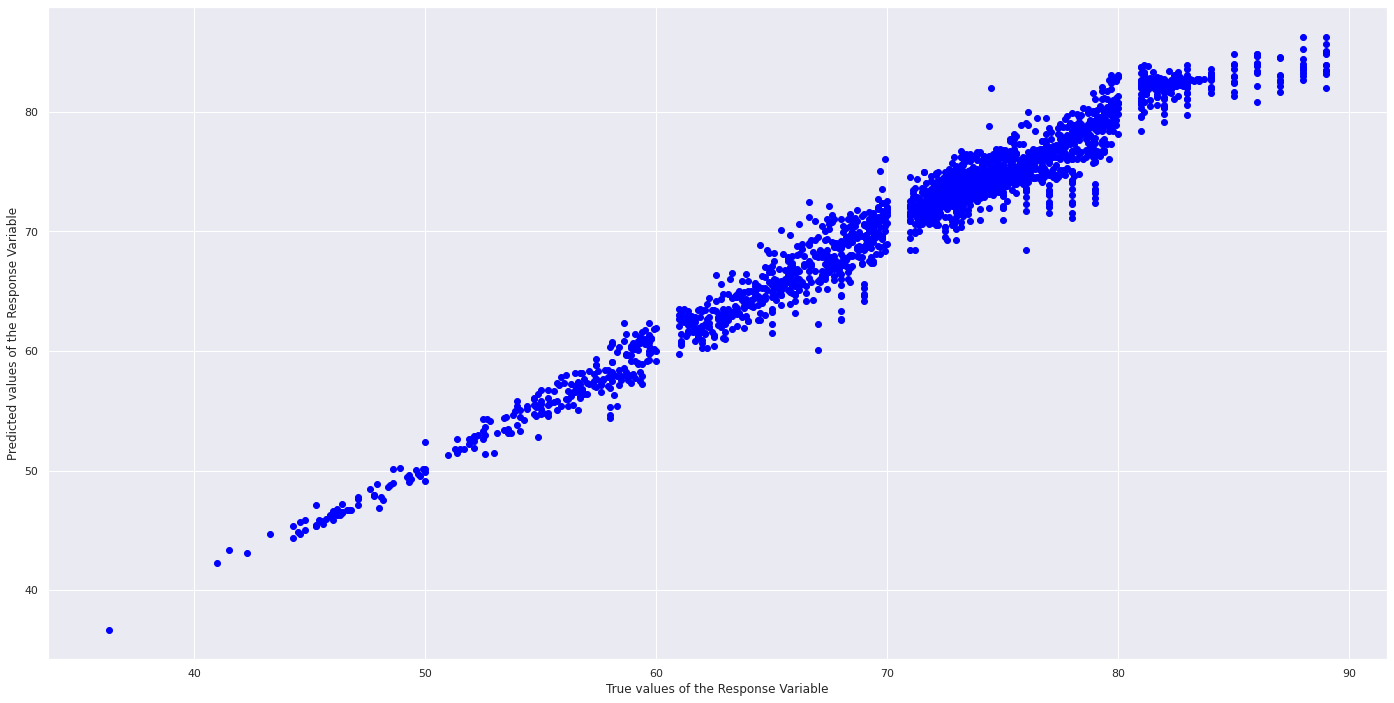

In [42]:
# Predict the Total values from Predictors
Y_pred = GS.predict(fX)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(Y, Y_pred, color = "blue")
axes.set_xlabel("True values of the Response Variable")
axes.set_ylabel("Predicted values of the Response Variable")
plt.show()

The new model has a better explained variance value compared to the previous one. As such, the new model should be used to predict life expectancy.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bee8c7d0-351c-4179-bde7-2fc8bba8fae0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>